In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
def show_state(env, episode,step, info=""):
    plt.figure(99999,figsize=[8,6])
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("episode: {} step: {} ".format(episode,step))
    #plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [5]:
import gym

In [6]:
import time

In [7]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [9]:
env = gym.make('Taxi-v3')

In [10]:
number_of_states=env.observation_space.n
number_of_actions=env.action_space.n

In [12]:
print(number_of_states)

500


In [13]:
print(number_of_actions)

6


In [14]:
Q=torch.zeros([number_of_states,number_of_actions])

In [15]:
gamma=0.9

In [18]:
egreedy=0.7

In [16]:
egreedy_final=0.05
egreedy_decay=0.999

In [19]:
%%time

num_episodes=1000

steps_total=np.full([num_episodes],-999,dtype=np.int32)
rewards_total=np.full([num_episodes],-999,dtype=np.float32)
egreedy_total=np.full([num_episodes],-999,dtype=np.float32)

for i_episode in range(num_episodes):
    
    state = env.reset()
    #for step in range(100):
    step=0
    #print("____INITIAL STATE____")
    #env.render()
    #print("^^^^^^^^^^^^^^^^^^^^^")
    while True:
        
        step+=1
        
        random_for_egreedy=torch.rand(1).item()
        
        if random_for_egreedy>egreedy:
            Q_eps=0.001*torch.randn([number_of_actions])
            action=torch.argmax(Q[state]+Q_eps).item()
        else:
            action=env.action_space.sample()
                
        if egreedy>egreedy_final:
            egreedy*=egreedy_decay
            
        new_state, reward, done, info = env.step(action)
        
        Q[state,action]=reward+gamma *torch.max(Q[new_state]).item()
        
        state=new_state
        
        #time.sleep(0.4)
        #print("------------------------")
        #env.render() 
        #print("++++++++++++++++++++++++")
        #print('new state: ',new_state)
        #print('info: ', info)
        
        #show_state(env.env,i_episode,step)
        
        if done:
            steps_total[i_episode]=step
            rewards_total[i_episode]=reward
            egreedy_total[i_episode]=egreedy
            print("Episode finished after: {}".format(step))
            break
        

Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 133
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 200
Episode finished after: 155
Episode finished after: 71
Episode finished after: 200
Episode finished after: 184
Episode finished after: 130
Episode finished after: 182
Episode finished after: 200
Episode finished after: 137
Episode finished after: 27
Episode finished after: 85
Episode finished after: 131
Episode finished after:

Episode finished after: 13
Episode finished after: 15
Episode finished after: 13
Episode finished after: 19
Episode finished after: 13
Episode finished after: 22
Episode finished after: 15
Episode finished after: 11
Episode finished after: 12
Episode finished after: 24
Episode finished after: 18
Episode finished after: 12
Episode finished after: 23
Episode finished after: 14
Episode finished after: 11
Episode finished after: 11
Episode finished after: 8
Episode finished after: 7
Episode finished after: 17
Episode finished after: 16
Episode finished after: 9
Episode finished after: 14
Episode finished after: 17
Episode finished after: 16
Episode finished after: 17
Episode finished after: 15
Episode finished after: 12
Episode finished after: 13
Episode finished after: 18
Episode finished after: 20
Episode finished after: 16
Episode finished after: 19
Episode finished after: 27
Episode finished after: 17
Episode finished after: 13
Episode finished after: 12
Episode finished after: 7
Episo

Episode finished after: 13
Episode finished after: 13
Episode finished after: 11
Episode finished after: 17
Episode finished after: 21
Episode finished after: 14
Episode finished after: 13
Episode finished after: 6
Episode finished after: 11
Episode finished after: 10
Episode finished after: 17
Episode finished after: 23
Episode finished after: 20
Episode finished after: 13
Episode finished after: 16
Episode finished after: 18
Episode finished after: 12
Episode finished after: 15
Episode finished after: 15
Episode finished after: 11
Episode finished after: 18
Episode finished after: 13
Episode finished after: 12
Episode finished after: 23
Episode finished after: 17
Episode finished after: 14
Episode finished after: 16
Episode finished after: 12
Episode finished after: 13
Episode finished after: 17
Episode finished after: 15
Episode finished after: 15
Episode finished after: 13
Episode finished after: 16
Episode finished after: 12
Episode finished after: 17
Episode finished after: 14
Ep

In [20]:
print("Average number of steps: {}". format(np.average(steps_total)))

Average number of steps: 30.552


In [21]:
print("Average number of steps in last 100 episodes: {}". format(np.average(steps_total[-100:])))

Average number of steps in last 100 episodes: 14.66


In [22]:
print("Fraction of episodes finished succesfully {}".format(np.average(rewards_total)))

Fraction of episodes finished succesfully 19.13599967956543


In [23]:
print("Fraction of episodes finished succesfully in last 100 episodes {}".format(np.average(rewards_total[-100:])))

Fraction of episodes finished succesfully in last 100 episodes 20.0


In [24]:
print(Q)

tensor([[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
        [ -5.6953,   0.4604,  -5.6953,  -5.6953,   1.6226,  -8.5396],
        [ -4.6856,   5.9432,  -4.0951,   5.9432,   7.7147, -10.0000],
        ...,
        [ -3.4390,  -3.4390,  -4.0951,  -4.0951, -10.0000, -10.9000],
        [ -4.0951,  -4.0951,  -4.0951,  -4.6856, -10.0000, -10.0000],
        [ -1.0000,  11.8700,  14.3000,  17.0000, -10.0000,   5.3000]])


In [21]:
#print(rewards_total)

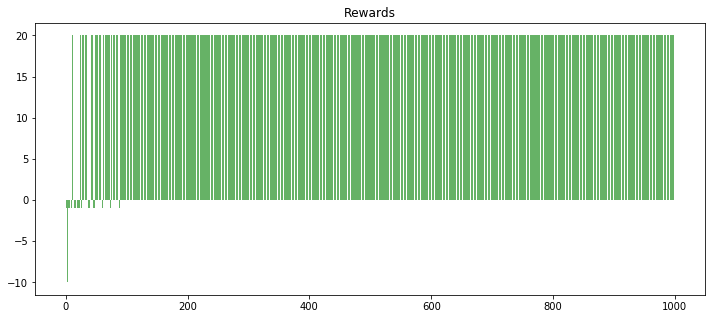

In [25]:
plt.figure(1,figsize=[12,5])
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total,alpha=0.6, color='green')
#plt.plot(rewards_total)
plt.show()

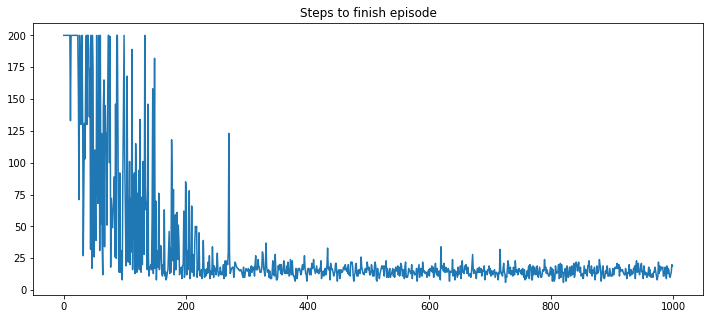

In [26]:
plt.figure(2,figsize=[12,5])
plt.title("Steps to finish episode")
plt.plot(steps_total)
plt.show()

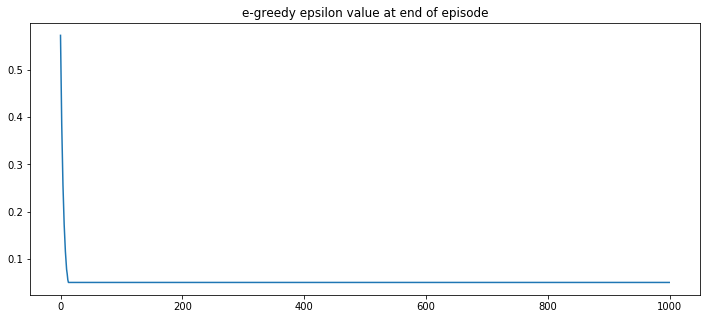

In [27]:
plt.figure(3,figsize=[12,5])
plt.title("e-greedy epsilon value at end of episode")
plt.plot(egreedy_total)
plt.show()

In [25]:
env.env.P

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(